# Comparing Means
## Statistics for Data Science

## The Data

The American National Election Studies (ANES) conducts surveys of voters in the United States.  While its flagship survey occurs every four years at the time of each presidential election, ANES also conducts pilot studies midway between these elections.  You are provided with data from the 2018 ANES Pilot Study.

For a glimpse into some of the intricacies that go into the design of this study, take a look at the introduction to the [ANES User's Guide and Codebook](https://electionstudies.org/wp-content/uploads/2019/02/anes_pilot_2018_userguidecodebook.pdf).

It is important to consider the way that the ANES sample was created.  Survery participants are taken from the YouGov panel, which is an online system in which users earn rewards for completing questionnaires.  This feature limits the extent to which results generalize to the U.S. population.

To partially account for differences between the YouGov panel and the U.S. Population, ANES assigns a survey weight to each observation.  This weight estimates the degree to which a citizen with certain observed characteristics is over- or under-represented in the sample.  For the purposes of this assignment, however, you are not asked to use the survey weights.  (For groups with a strong interest in survey analysis, we recommend that you read about R's [survey package](http://r-survey.r-forge.r-project.org/survey/).  We will assign a very small number of bonus points (up to 3) to any group that correctly applies the survey weights and includes a clear explanation of how these work).

In [ ]:
install.packages('ggplot2')
install.packages('tidyverse')
install.packages('colorspace')
install.packages('effsize')
install.packages('dplyr')

In [32]:
library(effsize)
library(dplyr)
library(ggplot2)
library(tidyverse)
library(colorspace)

In [33]:
A = read.csv("anes_pilot_2018.csv")

In [34]:
length(A)
summary(A$ftpolice)
summary(A$ftjournal)
length(A$ftpolice)
length(A$ftjournal)
# objects()
# A

[1] 767

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   47.00   70.00   64.68   90.00  100.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -7.00   21.00   52.00   52.26   82.00  100.00 

[1] 2500

[1] 2500

Following is an example of a question asked on the ANES survey:

> How difficult was it for you to vote in this last election?

The variable `votehard` records answers to this question, with the following encoding:

- -1 inapplicable, legitimate skip
- 1 Not difficult at all
- 2 A little difficult
- 3 Moderately difficult
- 4 Very difficult
- 5 Extremely difficult


To see the precise form of each question, take a look at the [Questionnaire Specifications](https://electionstudies.org/wp-content/uploads/2018/12/anes_pilot_2018_questionnaire.pdf).

Using the ANES dataset to address five research questions.  For each question, you will need to operationalize the concepts (selecting appropriate variables and possibly transforming them), conduct exploratory analysis, deal with non-response and other special codes, perform sanity checks, select an appropriate hypothesis test, conduct the test, and interpret your results.  When selecting a hypothesis test, you may choose from the tests covered in the async videos and readings.  These include both paired and unpaired t-tests, Wilcoxon rank-sum test, Wilcoxon signed-rank test, and sign test.  You may select a one-tailed or two-tailed test.

Please organize your response according to the prompts in this notebook.

Note that this is a group lab.  There is a **maximum of three students per team.**
Although you may work on your own, we do not recommend this (we have found that individuals tend to do worse than teams on past labs).

Please limit your submission to 5000 words, not counting code or figures.  We will use some python code like the following to perform the wordcount on your notebook or Rmd file.

```
import nbformat

with open('W203_Lab_2.ipynb') as f:
    nb = nbformat.read(f, as_version=4)
    total_words = 0

    for cell in nb['cells']:
        if cell['cell_type'] == 'markdown':
            total_words += len(cell['source'].split())
    print("Total words:", total_words)
```


# Research Questions

## Question 1: Do US voters have more respect for the police or for journalists?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

**Variables**

For this question we will operationalize two variables: *ftpolice* and *ftjournal*. 
* *ftpolice* and *ftjournal* variables have ratings from 0 to 100. 
* These are measured on a feeling thermometer scale, 100 being very warm or favorable and 0 being very cold and unfavorable. 
* *ftpolice* answers the question - How would you rate the police? 
* *ftjournal* answers the question - How would you rate the journalists. 

**Gaps**

There is a gap between these operationalized variables and the questions - *Do voters respect police over journalists?*
* Respect cannot be accurately measured by just one variable measuring favorable rating. 
* A favorable rating could be given for many reasons and cannot be equated to respect alone. 
* But conceptually, we tend to favorably rate things we respect and feel warm towards that. 
* With that argument, we will be using these variables for our analysis.
    * Ratings between 0 and 50 would be considered unfavorable or cold and ratings between 50 and 100 will be considered favorable or warm. 
    * Ratings between 50 degrees and 100 degrees mean that you feel favorable and warm toward the person. 
    * Ratings between 0 degrees and 50 degrees mean that you don't feel favorable toward the person and that you don't care too much for that person. 
    * You would rate the person at the 50 degree mark if you don't feel particularly warm or cold toward the person

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

We start by plotting a histogram of the two variables :

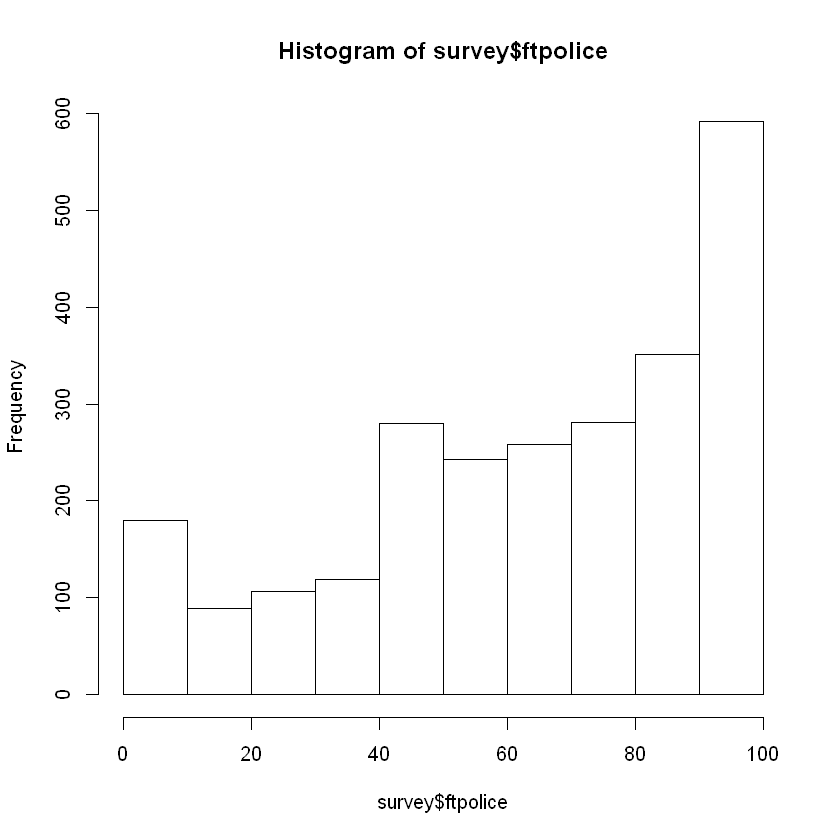

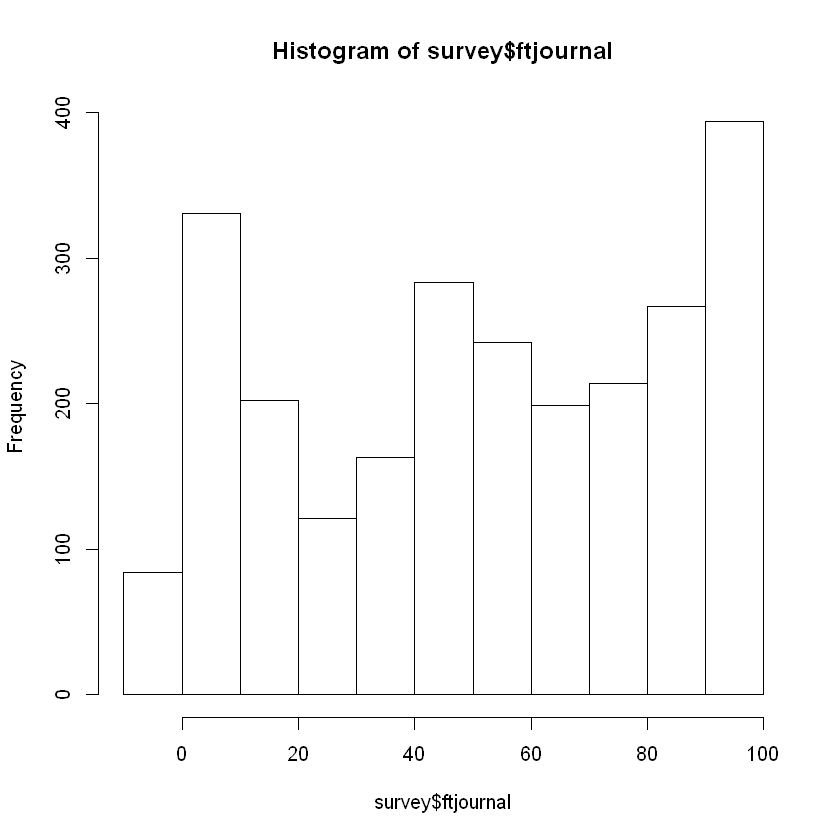

In [9]:
survey = read.csv('anes_pilot_2018.csv')
hist(survey$ftpolice)
hist(survey$ftjournal)

***ftpolice*** variable histogram shows higher concentration toward high rankings compared to ***ftjournal*** variable. 

Next we summarize the data in these two variables. 

In [10]:
summary(survey$ftpolice)
summary(survey$ftjournal)
jnegative = survey$ftjournal[survey$ftjournal<0]
length(jnegative)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   47.00   70.00   64.68   90.00  100.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -7.00   21.00   52.00   52.26   82.00  100.00 

[1] 2

***ftpolice*** has mean of 64.68 and median of 70 compared to ***ftjournal*** that has mean 52.26 and median 52.26. 
* This gives us an insight into how people taking the survey have rated the two.
* *ftjournal* has two negative values. 
* Since the feelings thermometer range is between 0 and 100 these seems to be erroneous. 

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

**Hypothesis Test**

We will keep these values since we need the same sample size for both variables to perform ***Wilcoxon signed rank test***

$ H_0 $ = US voters' respect for police is the same as respect for journalists

$ H_A $ = US voters' respect for poice is NOT the same as respect for journalists

**Assumptions**

Our preferred choice here is *Wilcoxon signed-rank test*

1) Ordinal scale - There is a clear rank order, with 100 > 99 > 98...0. We would not call this a metric variable, since the difference between 100 and 70 may not be the same as the difference between 70 and 40. This means, for example, that it wouldn't be valid to average 100 and 70, and call the result equivalent to a 85. (For this reason, a t-test is not valid)

2) Random sampling - There are many reasons to suspect that people taking the survey are not fully independent. There could be clustering for the people from the same family or community taking the survey. People from the same community or family tend to have similar opinions on politics and national issues. To partially account for differences between the YouGov panel and the U.S. Population, ANES assigns a survey weight to each observation. This weight estimates the degree to which a citizen with certain observed characteristics is over- or under-represented in the sample. However, we are not using the weights for this exercise.

3) The two variables are paired since the two ratings are from the same people.


### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [11]:
wilcox.test(survey$ftpolice,survey$ftjournal, mu=0, paired = T, alternative = "two.sided", conf.int = T)


	Wilcoxon signed rank test with continuity correction

data:  survey$ftpolice and survey$ftjournal
V = 1861935, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
  9.999927 14.000043
sample estimates:
(pseudo)median 
      11.99996 


In [12]:
cohen.d(survey$ftpolice,survey$ftjournal)


Cohen's d

d estimate: 0.4041218 (small)
95 percent confidence interval:
    lower     upper 
0.3481091 0.4601345 


**(1)** Statistical Significance

The test is statically significant with very small p value

**(2)** Practical significance

The effect size is small (.4) 

**Findings**

This means that the we reject the null hypothesis. The true location shift is not equal to 0, meaning people don't rate police and journalists the same. However, the effect size of this is small.

## Question 2: Are Republican voters older or younger than Democratic voters?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

In [13]:
# age will be calculated by respondents' year of birth (birthyr)
summary(A$birthyr)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1927    1956    1966    1969    1983    2000 

**pid1d** in questionaire: *Generally speaking, do you usually think of yourself as a Democrat, Republican, an independent or something else?*
* Democrat[1],
* Republican[2],
* independent[3],
* something else[4]?

in case pid1d = 3 or 4 or NO ANSWER
* ***pidlean*** in questionaire: *Do you think of yourself as closer to the Republican Party or to the Democratic Party?*
    * Closer to Republican Party[1], 
    * Closer to Democratic Party[2], 
    * Neither [3]

**pid7x** is then be calculated based on respond in *pid1d* and *pidlean*
* Strong Dem[1],
* Not very strong Dem[2],
* Ind, closer to Dem[3],
* Independent[4],
* Ind, closer to Rep [5], 
* Not very strong Rep[6], 
* Strong Rep[7] 

In [14]:
summary(A$pid7x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -7.000   1.000   4.000   3.285   5.000   7.000 

In [15]:
# Count number of Democrat & Republican respondents
aggregate(A$pid7x, 
          by=list(A$pid7x),
          FUN=length)

Group.1,x
-7,98
1,581
2,276
3,279
4,417
5,241
6,200
7,408


Operationalization of age difference between voters who identified themselves as Republican and those self-identified as Democrat is a quite straight forward exercise, given we have 2 random variables from questionaires:

1) **birthyr**: *In what year, you were borned?* 

2) **pidx**: *Party ID summary*

We could run two-mean hypothesis test of age (2018 - birthyr) between those who has pid1d of [1] and [2]

Exploratory Data Analysis also shows a large number of inapplicable, and legitimate skip input (1,331 observations) as indicated by pid1d of [-1].

In [16]:
# A_2 is the subset of data with two columns for question 2
A_2 <- A[,c("pid7x","birthyr")]
# A_2 command mean?

# separate Dem and Rep into two dataframe based on pid7x analysis from responds 
A_2D <- subset(A_2, pid7x==1 | pid7x==2 | pid7x==3)
A_2R <- subset(A_2, pid7x==5 | pid7x==6 | pid7x==7)

A_2D <- mutate(A_2D, age = 2018-birthyr)
A_2R <- mutate(A_2R, age = 2018-birthyr)

summary(A_2D)
dim(A_2D)

summary(A_2R)
dim(A_2R)

     pid7x          birthyr          age       
 Min.   :1.000   Min.   :1927   Min.   :18.00  
 1st Qu.:1.000   1st Qu.:1955   1st Qu.:35.00  
 Median :1.000   Median :1966   Median :52.00  
 Mean   :1.734   Mean   :1968   Mean   :49.64  
 3rd Qu.:2.000   3rd Qu.:1983   3rd Qu.:63.00  
 Max.   :3.000   Max.   :2000   Max.   :91.00  

[1] 1136    3

     pid7x          birthyr          age       
 Min.   :5.000   Min.   :1928   Min.   :18.00  
 1st Qu.:5.000   1st Qu.:1952   1st Qu.:41.00  
 Median :6.000   Median :1962   Median :56.00  
 Mean   :6.197   Mean   :1965   Mean   :53.33  
 3rd Qu.:7.000   3rd Qu.:1977   3rd Qu.:66.00  
 Max.   :7.000   Max.   :2000   Max.   :90.00  

[1] 849   3

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

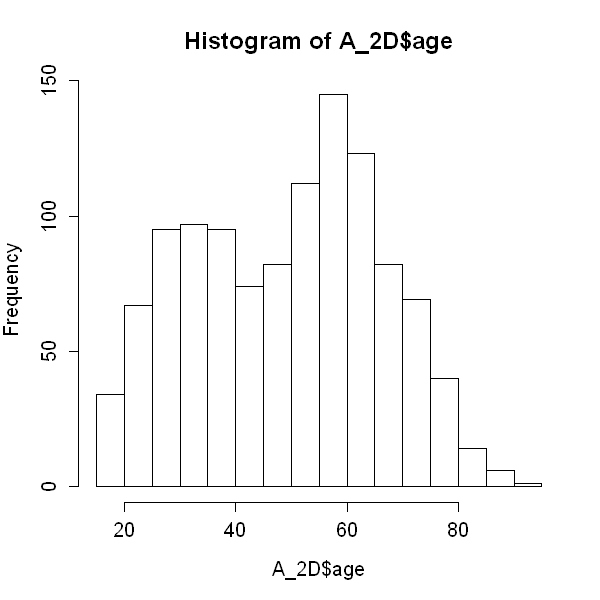

In [17]:
options(repr.plot.height = 5, repr.plot.width = 5, repr.plot.pointsize= 10)
hist(A_2D$age)

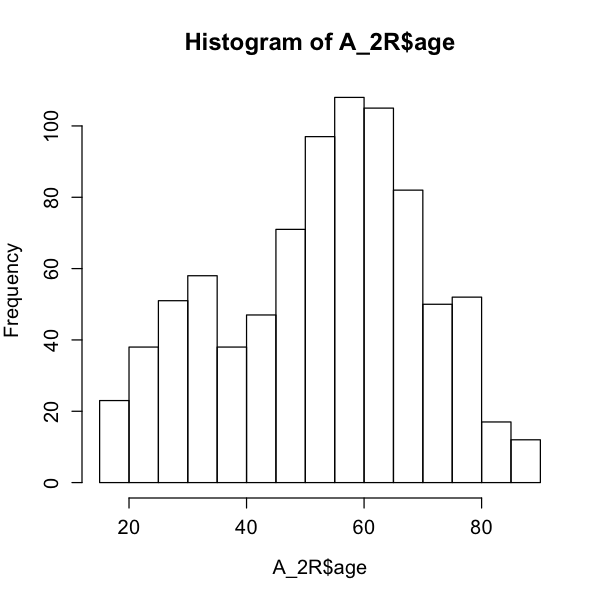

In [15]:
hist(A_2R$age)

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

**Hypothesis Test**

$ H_0 = $ Difference in means is equal to 0

$ H_A = $ Difference in means is not equal to 0

This is a great case for an **unpaired t-test** based on the following required assumption:

**Assumptions**

1) Metric scale. "Year of Birth" and the calculated "Age" from this questionaire (ie, most respondents could provide their exact year of birth, unlike, say specifi year of first smoking, which people could be more foggy to recall and might need to provide respond in range of year) have fixed unit of measurement, so is considered as metric.

2) Random sampling. Variable from the survey is considered independent, as the study was conducted on a lare and diverse set of over a million respondents, where responders were selected by sample matching. However, given survey participants are taken from online system in which users earn rewards from completing questionarires, there are minor reasons to suspect that sampling plan might not be fully independent. There could be clustering effects based on similar income group or geographic community who share news and attractiveness of the rewards.

3) Normality. We have a large sample so we can use the CLT to justify a parametric test. We also examine a histogram of birthyr if there is an unusual departure from normality, especially an unusual skew. There is no cause for alarm here, so we could proceed with the parametric test.

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [16]:
t.test(A_2D$age, A_2R$age, paired = FALSE)


	Welch Two Sample t-test

data:  A_2D$age and A_2R$age
t = -4.805, df = 1823.3, p-value = 1.674e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.192611 -2.182347
sample estimates:
mean of x mean of y 
 49.63996  53.32744 


**(1)** Statistical Significance

As p-value is lower than 2.5%, we reject null hypothesis with statistical significance. There are true difference between the mean ages of Republican and Democrat voters.

In [17]:
cohen.d(A_2D$age, A_2R$age)


Cohen's d

d estimate: -0.2180997 (small)
95 percent confidence interval:
     lower      upper 
-0.3073297 -0.1288697 


**(2)** Practical Significance

As Cohend'D is -0.21, it is considered as small to medium practical significant. This means even though t-test result indicate rejection of the null hypothesis, we could not conclude the differece in mean ages with practical significance.

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

**Question**

Currently, thre are federal investigations of Russian election interference.  

A voter would beleive that this investigation is baseless if the voter thinks that the interference probably didn't happen.

We want to study from our sample data, whether a majority of independent voters believe that the federal investigations of Russian election interference are baseless.

From the sample of independent voters, we can test whether or not they believe the federal investigation is baseless.

*(Definition of Interference* : *take part or intervene in an activity without invitation or necessity)*

**Variables**

`pid7x` *Party ID summary*
* We can use this variable and the values below to get the sample of voters who consider themselves independent. (Not Democrat nor Republican.)
    * 3 - Independent, closer to Democrat
    * 4 - Independent
    * 5 - Independent, closer to Republican

`russia16` *Do you think the Russian government probably interfered in the 2016 presidential election
to try to help Donald Trump win, or do you think this probably did not happen?*
* We can use it to get the quantity
    * -7 means No answer
    * 1 means Russia probably interfered
    * 2 means probably didn't happen
    
**may-seem-relevant Variables, but cannot use**

`coord16`  *Do you think Donald Trump’s 2016 campaign probably coordinated with the Russians, or do
you think his campaign probably did not do this?*
* Although this variable may seem somewhat relevant, we cannot use this because: 
    1. a campaign coordinating with Russians doesn't mean that the government interfered
    2. even if the government was found to have an influence or impact upon investigation, if the campaign coordinated with the Russians, that doesn't that count as interference (from the definition, taking part without invitation)

`russia`  *During the past 12 months, do you think U.S. policy has been too tough, about right, or not
tough enough with these countries?*
* This variable is also not applicable, because we are only concerned with notion of election interference. 

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

In [18]:
# A_4 is the subset of complete survey data with just the two columns we want
A_4 <- A[,c("russia16","pid7x")]

    ## summary(A_4)
    ## dim(A_4)

# Removing the non-independent voters (selecting only the values of pid17x with 3, 4 and 5)
A_4 <- subset(A_4, pid7x==3 | pid7x==4 | pid7x==5)

cat("Summary:")
summary(A_4)

cat("Dimensions of Subset A_4:")
dim(A_4)

cat("We have a total of",nrow(A_4), "independent voters")

Summary:

    russia16          pid7x      
 Min.   :-7.000   Min.   :3.000  
 1st Qu.: 1.000   1st Qu.:3.000  
 Median : 1.000   Median :4.000  
 Mean   : 1.458   Mean   :3.959  
 3rd Qu.: 2.000   3rd Qu.:5.000  
 Max.   : 2.000   Max.   :5.000  

Dimensions of Subset A_4:

[1] 937   2

We have a total of 937 independent voters

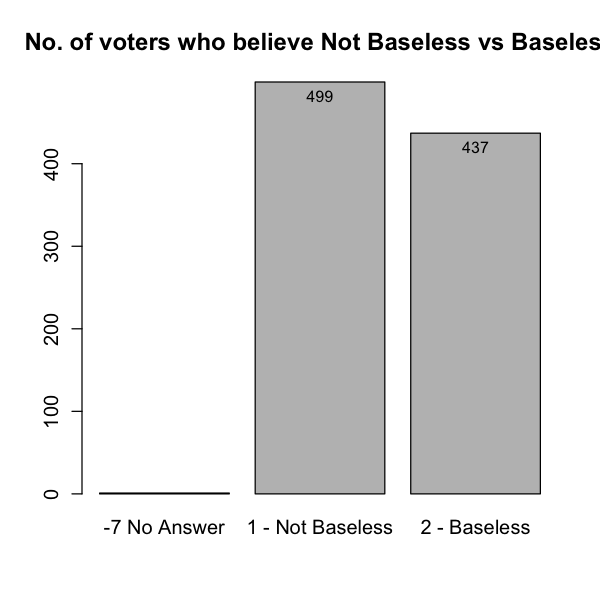

In [19]:
# Visualization
freq <- table(A_4$russia16)
x <- barplot(freq, main="No. of voters who believe Not Baseless vs Baseless", names.arg=c("-7 No Answer", "1 - Not Baseless","2 - Baseless"))
text(x, y = freq, labels = freq, pos = 1, cex = 0.8)

In [20]:
## In our data, we have one outlier. 
## One voter chose -7 (No answer) when asked if they believe the Russian government interfered in the elections

## Our question is to see if a majority of independent voters believe the investigation is baseless...
## .. in other words, if they believe that "Russians probably didn't interfere"

## If the voter beleives Russians did interfere, then according to them the investigations are NOT baseless

## Giving No answer is not an appropriate response to include in the sample of independent voters

# So, we must remove the value of -7
A_4 <- subset(A_4, russia16==1 | russia16==2)

cat("Summary:")
summary(A_4)

cat("Dimensions of Subset A_4:")
dim(A_4)

cat("We have a total of",nrow(A_4), "independent voters, who either believe the investigations are baseless or not baseless")

Summary:

    russia16         pid7x      
 Min.   :1.000   Min.   :3.000  
 1st Qu.:1.000   1st Qu.:3.000  
 Median :1.000   Median :4.000  
 Mean   :1.467   Mean   :3.959  
 3rd Qu.:2.000   3rd Qu.:5.000  
 Max.   :2.000   Max.   :5.000  

Dimensions of Subset A_4:

[1] 936   2

We have a total of 936 independent voters, who either believe the investigations are baseless or not baseless

In [21]:
# Voters who believe that the investigation is baseless (russia16 = 2)
baseless <- subset(A_4, russia16==2)

    ## summary(baseless)
    ## dim(baseless)

cat("Total number of voters who believe investigations are baseless are",nrow(baseless),"\n")

# Voters who believe investigation is NOT baseless (russia16 = 1)
based <- subset(A_4, russia16==1)

    ## summary(based)
    ## dim(based)

cat("Total number of voters who believe investigations are NOT baseless are",nrow(based))

Total number of voters who believe investigations are baseless are 437 
Total number of voters who believe investigations are NOT baseless are 499

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

**Hypothesis Test**
* Since we are testing the sizes of two groups, we will use the **Sign Test**.
* The sign test is a non-parametric test, we do not assume that the data is normally distributed. 

$ H_0 $ = No. of voters who believe the investigation is baseless is equal to No. of voters who believe there is reason (p=0.5)

$ H_A $ = No. of voters who believe the investigation is baseless does not equal No. of voters who believe there is reason 

**Assumptions**

* We assume that that the sample is a fair representation of the population, and drawn by the process of random sampling
* We also assume that the sample items are independent and dichotomous


* In our sample of independent voters (subset A_4), we will define asking the question of whether or not the voter believes the investigations are baseless. 
    * Here, the number of trials will be the total number of voters
    * A success is defined as the voter believing the investigation is baseless

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [22]:
# We will use the binom.test function of R

# No. of Trial and Success calculation
total <- nrow(A_4)
success <- nrow(baseless)

# Test
binom.test(success, total, 0.5)


	Exact binomial test

data:  success and total
number of successes = 437, number of trials = 936, p-value = 0.04611
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4345321 0.4994375
sample estimates:
probability of success 
             0.4668803 


**(1)** Statistical Significance

*p-value* is lesser than 0.05
* so we can reject our Null hypothesis
* Our p-value is statistically significant 
* So, the number of voters who believe this investigation is baseless is NOT equal to the number who don't


In this binomial test, we see our observed probability $ p_0 = 0.466 $ 

The Relative risk is 0.466/0.5 = 0.932

Therefore the relative risk of a success in this trial is 0.9

In [23]:
# Let us run the one-proportion Z-test

# The observed proportion value (probability of success)
p_0 <- 0.466

# q value
q <- 1 - p_0

# We will define the expected proportion value as 0.5
p_e <- 0.5

# Number of trials 
n <- total

# Z-Test
z <- (p_0 - p_e)/sqrt((p_0 * q)/n)

cat("The test statistic (absolute z-value) is ",abs(z))

The test statistic (absolute z-value) is  2.085227

**(2)** Practical Significance

The test statistic $ |z| $ is greater than 1.96

Our test is significant

## Question 4: Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

This topic explores a form of a comparison--gauging whether anger or fear played more of a role in increasing voter turnout from 2016 to 2018. The null hypothesis would be that both anger and fear held the same amount of sway in increasing voter turnout from 2016 to 2018. The alternate hypothesis would be that fear and anger held differing roles in increasing voter turnout from 2016 to 2018.

###### Operationalizing the Variables: 
* Anger: this will be defined as a time a respondent expressed anger at the overall state of politics in the country (as indicated in geangry), other forms of anger towards specific groups (i.e. imangry) will not be considered as we believe this would be testing a certain attitude rather than general anger.
* Fear: this will be defined as a time a respondent expressed fear at the overall state of politics in the country (as indicated in geafraid), other forms of fear towards specific groups (i.e. imfear) will not be considered as we believe this would be testing a certain attitude rather than general fear.
* Increase in voter turnout: voter turnout will be determined using the variables: turnout16, and turnout18; the difference between voter turnout (increase) between 2016 and 2018 will be the dependent variable. We have decided to keep the following cases in the dataset: citizen voted both years, citizen voted in 2016 and not in 2018, and citizen voted in 2018 and not in 2016. We contemplated only including cases where there was a positive increase in voter turnout (i.e. citizen voted in 2018, but not in 2016), but we found that it was important to have differing values for the dependent variable (increase in voter turnout). It is important to note that we are using "increases" in voter turnout (whether postivie, negative, or neutral) rather turnout itself.

##### Technical Detail on Independent Variables

###### geangry:
* Question: How do you feel about the way things are going in the country: angry
* Potential Responses:  
-7 No Answer  
1 Not at all  
2 A little  
3 Somewhat  
4 Very  
5 Extremely  
* Treatment in test: the question implies a comparison between angry and fearful groups, only responses that indicate anger (response = 2+) will be used in the test to represent the "angry" group. "No answer" responses will be filtered out.

###### geafraid:
* Question: How do you feel about the way things are going in the country: afraid
* Potential Responses:  
-7 No Answer  
1 Not at all  
2 A little  
3 Somewhat  
4 Very  
5 Extremely  
* Treatment in test: the question implies a comparison between angry and fearful groups, only responses that indicate fear (response = 2+) will be used in the test to represent the "fearful" group. "No answer" responses will be filtered out.


###### turnout16
* Question: Asks citizens whether they voted in the 2016 election:
* Potential Repsonses:
1 Definitely voted
2 Definitely did not vote
3 Not completely sure

###### turnout18
* Question: Asks citizens whether they voted in the 2016 election:
* Potential Repsonses:
1 Definitely voted in person on Nov 6
2 Definitely voted in person, before Nov 6
3 Definitely voted by mail
4 Definitely did not vote
5 Not completely sure

###### Independent Variables:
X1: anger, X2: fear

###### Dependent Variable:
Y: increase in voter turnout

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

In [24]:
turnout_16<-A$turnout16
turnout_18<-A$turnout18
ge_angry<-A$geangry
ge_afraid<-A$geafraid

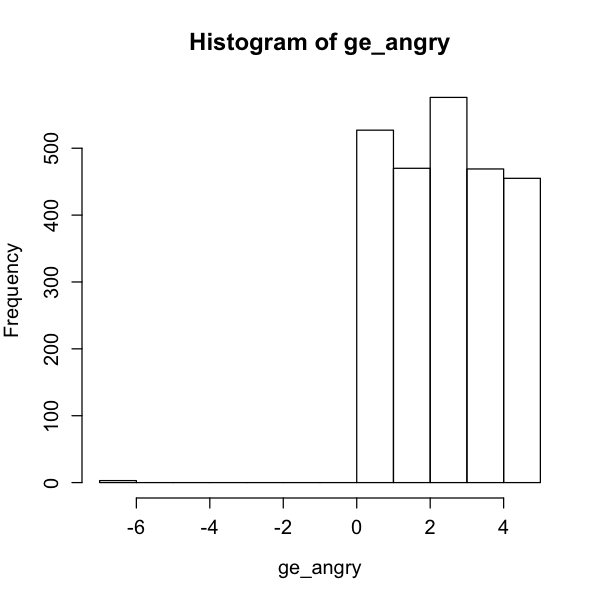

In [25]:
hist(ge_angry) #negative values will be filtered out in the future

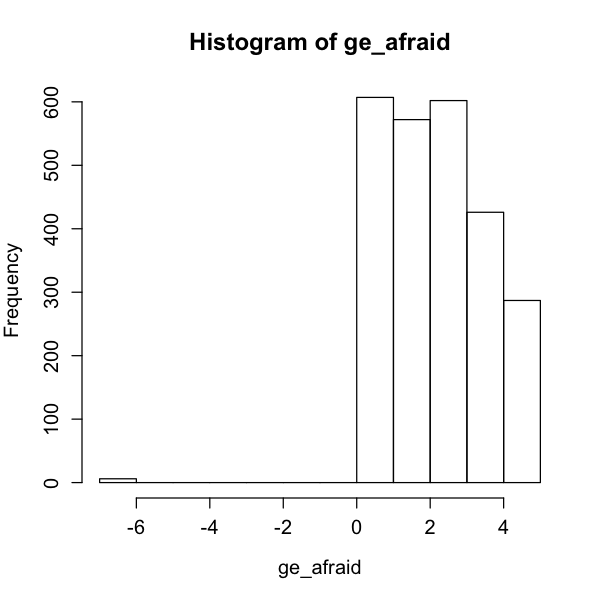

In [26]:
hist(ge_afraid) #negative values will be filtered out in the future

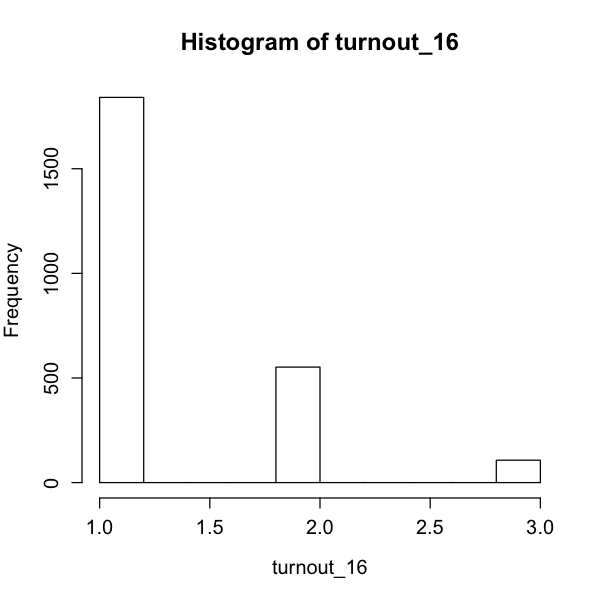

In [27]:
hist(turnout_16) #only the value of 1 indicates a true vote, other values will be filtered out

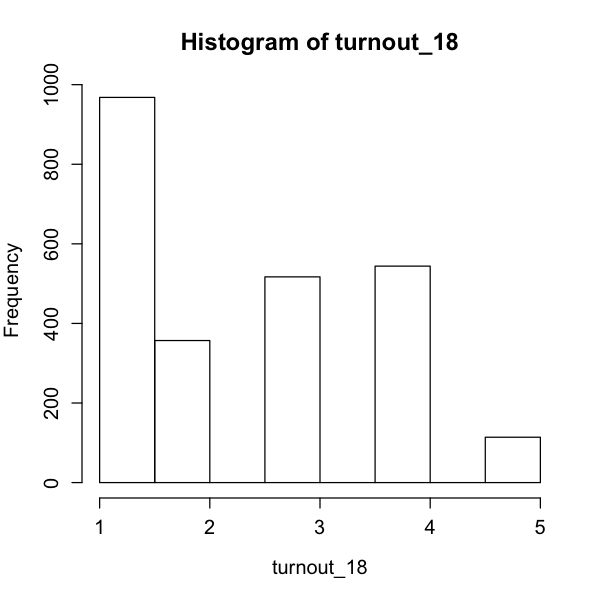

In [28]:
hist(turnout_18) #values 1,2,3 indicate a vote, other values will be filtered out

In [21]:
#filtering out negative and not sure values to only include the angry and afraid groups
#filtering out citizens who don't know if they did or didn't vote
q4<-filter(A, geangry>0 & geafraid>0  & turnout18!=5 & turnout16!=3)

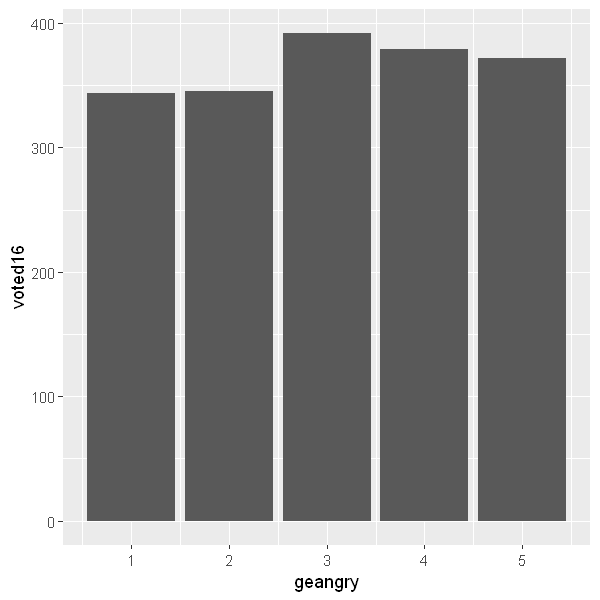

In [22]:
q4$voted16 <- ifelse(q4$turnout16==1, 1, 0) 
q4$voted18 <- ifelse(q4$turnout18<4, 1, 0)
p<-ggplot(data=q4, aes(x=geangry, y=voted16)) +
  geom_bar(stat="identity")
p

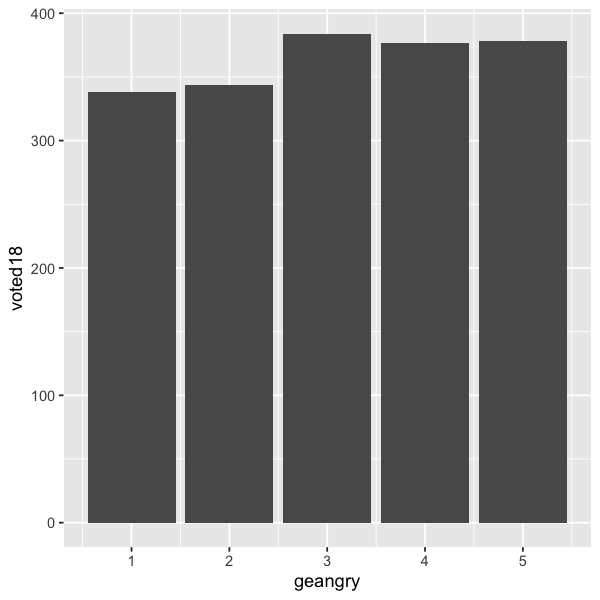

In [31]:
p<-ggplot(data=q4, aes(x=geangry, y=voted18)) +
  geom_bar(stat="identity")
p

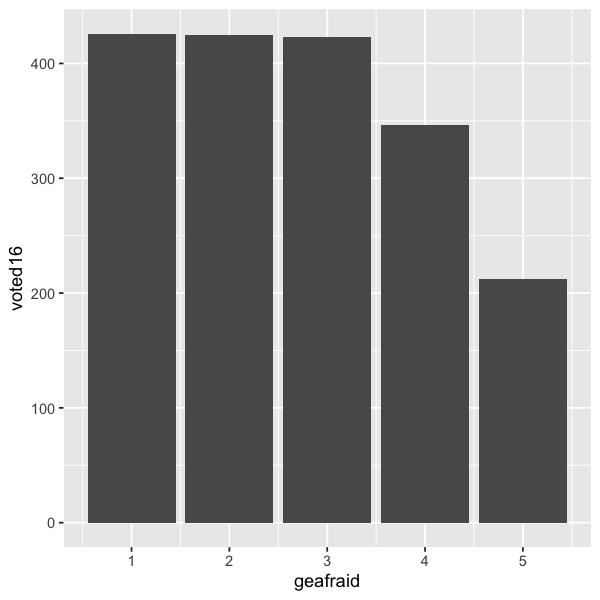

In [32]:
p<-ggplot(data=q4, aes(x=geafraid, y=voted16)) +
  geom_bar(stat="identity")
p

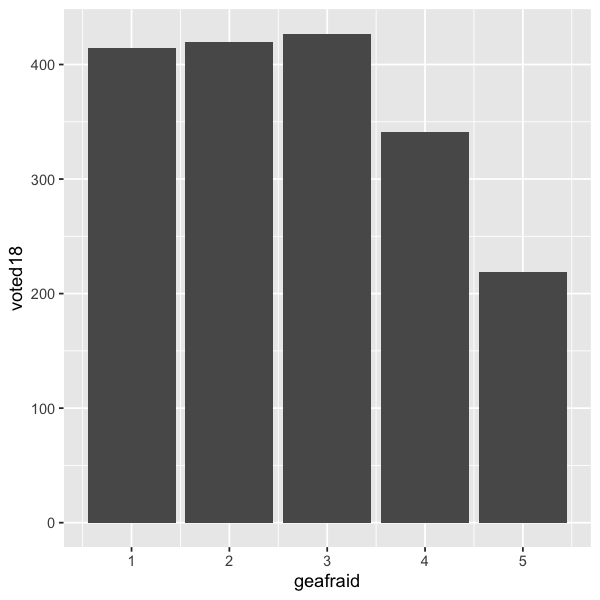

In [33]:
p<-ggplot(data=q4, aes(x=geafraid, y=voted18)) +
  geom_bar(stat="identity")
p

In [34]:
summary(q4$geafraid)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.695   4.000   5.000 

In [35]:
summary(q4$geangry)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.959   4.000   5.000 

In [23]:
agg_q4=aggregate(q4[,c("geafraid","geangry","voted16","voted18")],
                by = list(q4$geafraid, q4$geangry),
                FUN = sum)

In [24]:
agg_q4$increase<-agg_q4$voted18 - agg_q4$voted16

In [31]:
agg_q4

Group.1,Group.2,geafraid,geangry,voted16,voted18,increase
1,1,306,306,226,218,-8
2,1,234,117,83,85,2
3,1,120,40,23,24,1
4,1,52,13,9,9,0
5,1,20,4,3,2,-1
1,2,102,204,87,85,-2
2,2,398,398,159,156,-3
3,2,315,210,75,79,4
4,2,116,58,19,19,0
5,2,45,18,5,5,0


In [26]:
q4$increase<-q4$voted18 - q4$voted16

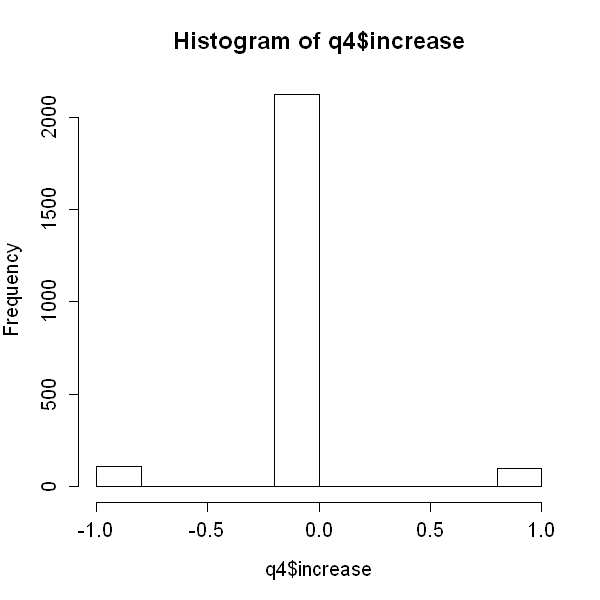

In [27]:
hist(q4$increase)

In [28]:
var(q4$geangry)

[1] 1.945823

In [29]:
var(q4$geafraid)

[1] 1.720119

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

The selected hypothesis test is a **unpaired  t-test**. This is because the dependent variable, increase in voter turnout, is parametric (t-test) and there are two, separate indpendent variables - fear and anger (unpaired).

**Reasoning**:
* The dependent variable (increase in voter turnout) is parametric rather than non-parametric
* The test should be unpaired, there are two variables within different subjects (the independent variables of fear and anger are separate subjects)

**Assumptions** of an unpaired t-test:
* Data is metric: this assumption is fulfilled as the increase is a metric variable
* Only two groups are compared: only the angry and fearful groups are being compared
* Two groups are independent: the test should be comparing the angry and fearful groups, fear and anger are not the same topic; because the dependent variable is "increase in turnout" rather than turnout at each point in time, this points to an unpaired test. 
* Data should be normally distributed: the histogram of increase shows a fairly normal distribution / bell shaped curve, with a high concentration in the middle of the curve and low concentrations on the ends of the curve.
* Groups should have equal variance: the independent variables (geangry and geafraid) have similar levels of variance (1.95 vs. 1.72)

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [43]:
t.test(q4$increase [q4$geafraid>1], q4$increase [q4$geangry>1], alternative = "two.sided", var.equal = FALSE)
#filtered out non-fearful and non-angry voters to compare the two groups of voters who were angry and fearful as the problem states


	Welch Two Sample t-test

data:  q4$increase[q4$geafraid > 1] and q4$increase[q4$geangry > 1]
t = 0.33081, df = 3609.4, p-value = 0.7408
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01612467  0.02267045
sample estimates:
    mean of x     mean of y 
 0.0005643341 -0.0027085590 


After completing the selected unpaired t-test, the result was compared to another unpaired hypothesis test - the rank sum test (which does not assume a normal distribution), and the results were similar (p=0.7408). We used this test as a comparison in the case someone could make the argument that the "increase" data followed a rank/non-parametric structure rather than a metric structure.

In [44]:
res <- wilcox.test( q4$increase[q4$geafraid > 1],  q4$increase[q4$geangry > 1])
res


	Wilcoxon rank sum test with continuity correction

data:  q4$increase[q4$geafraid > 1] and q4$increase[q4$geangry > 1]
W = 1640672, p-value = 0.7408
alternative hypothesis: true location shift is not equal to 0


In [45]:
cohen.d(q4$increase[q4$geafraid > 1], q4$increase[q4$geangry > 1])


Cohen's d

d estimate: 0.01100223 (negligible)
95 percent confidence interval:
      lower       upper 
-0.05420314  0.07620759 


#### Summary

##### Null Hypothesis ($H_0$):
Anger and fear were equally effective at driving increases in voter turnout

##### Alternative Hypothesis ($H_1$):
Anger and fear and not equally effective at driving increases in voter turnout

##### (1) Statistical Significance:
Because the p-value of the unpaired t-test is 0.7408, we fail to reject the null hypothesis that anger and fear played the same role in voter turnout increase from 2016 to 2018. 

##### (2) Practical Significance:
The effect size was  0.01100223 (negligible) indicating low practical significance.
 
##### Conclusion:
There is not strong evidence that fear and anger had differing levels of effectiveness at driving increases in voter turnout.

## Question 5: Did voters rate Donald Trump more favorably than Hillary Clinton?

### Clearly argue for the relevance of this question.  (10 points)
In words, clearly state your research question and argue why it is important for understanding the recent voting behavior. Explain it as if you were presenting to an audience that includes technical and non technical members.

Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

**Variables**

For this question we will operationalize two variables: *fthrc* and *fttrump*.
* *fthrc* and *fttrump variables* have ratings from 0 to 100. 
* These are measured on a feeling thermometer scale, 100 being very warm or favorable and 0 being very cold and unfavorable. 

<! Answer from Question 1 !>
* *ftpolice* answers the question - How would you rate the police? 
* *ftjournal* answers the question - How would you rate the journalists. 

**Gaps**

There is a gap between these operationalized variables and the questions - *Do voters respect police over journalists. Respect cannotbe accurately measured by just one variable measuring favorable rating. A favorable rating could be given for many reasons and cannot be equated to respect alone. But conceptually, we tend to favorably rate things we respect and feel warm towards that. With that argument, we will be using these variables for our analysis. Ratings between 0 and 50 would be considered unfavorable or cold and ratings between 50 and 100 will be considered favorable or warm.
Ratings between 50 degrees and 100 degrees mean that you feel favorable and warm toward
the person. Ratings between 0 degrees and 50 degrees mean that you don't feel favorable
toward the person and that you don't care too much for that person. You would rate the
person at the 50 degree mark if you don't feel particularly warm or cold toward the person.

<! --------- !>

### Perform EDA and select your hypothesis test (5 points)

Perform an exploratory data analysis (EDA) of the relevant variables.

This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

Based on your EDA, select an appropriate hypothesis test.
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

We start by plotting a histogram of the two variables:

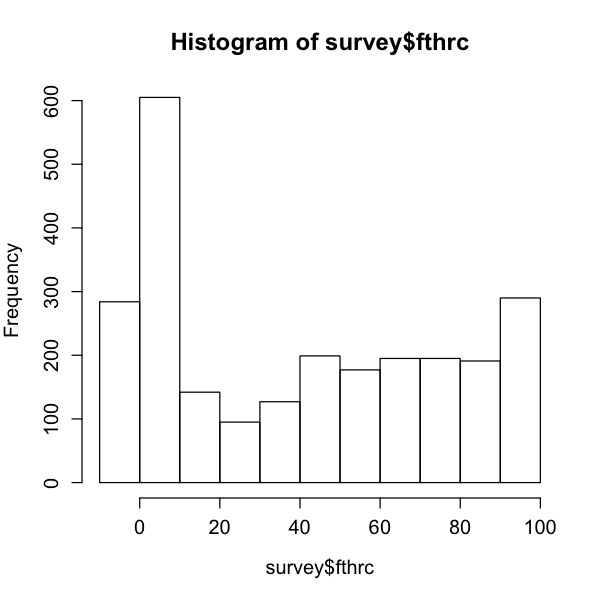

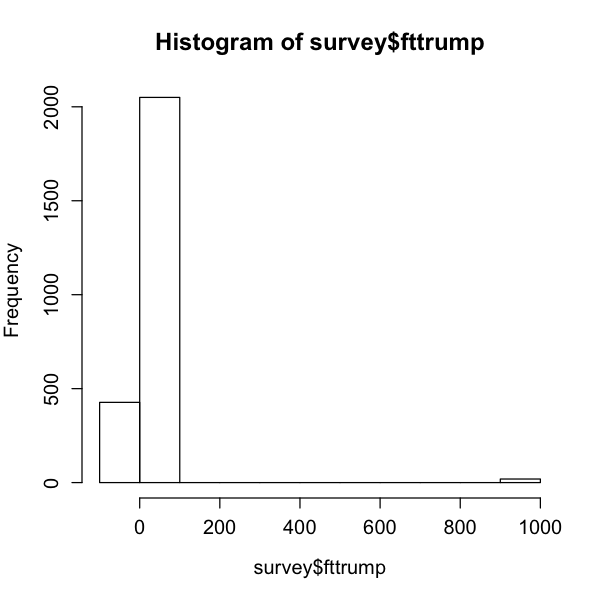

In [46]:
survey = read.csv('anes_pilot_2018.csv')
hist(survey$fthrc)
hist(survey$fttrump)

In [47]:
survey = read.csv('anes_pilot_2018.csv')
summary(survey$fthrc)
summary(survey$fttrump)
validtrump = subset(survey$fttrump,survey$fttrump>=0&survey$fttrump<=100&survey$fttrump!='NA')
length(validtrump)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -7.00    3.00   40.00   41.01   72.00  100.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -7.00    1.00   25.00   47.19   85.00  997.00       4 

[1] 2471

*fttrump* has 27 occurances of rating = 997. 

This seems errorneous since the thermometer scale goes stops at 100. We will need to analyze if these will skew the metrics. 

Comparing the summary of this dataset as-is, with the dataset after removing rating = 997 there is a large difference in the mean and median of these two datasets. 

This means, that these erroneous values are skewing the results of *fttrump* variable. 

We will need to handle these values before we run the hypothesis test. After removing the erroneous values and NA from the dataset we are left with 2471 values, which is still a large sample size. 

Next, we will need to analyze the *fthrc* dataset and manipulate it to keep the sample size same between the two variables. 

In [48]:
validhrc = subset(survey$fthrc,survey$fthrc>=0&survey$fthrc<=100&survey$fthrc!='NA')
#randomly removing few rows to keep sample size the same with validtrump variable
validhrc.df = as.data.frame(validhrc)
validhrc = validhrc[-sample(1:nrow(validhrc.df),27)]
length(validhrc)

[1] 2471

**Hypothesis Test**

Our preferred choice here is **Wilcoxon signed-rank test**. Below are the reasons to support this choice.

$ H_0 $ = The mean rating of Donald Trump is the same as mean rating of Hilary Clinton

$ H_A $ = The mean rating of Donald Trump is not the same as mean rating of Hilary Clinton


**Assumptions**

1) Ordinal scale - There is a clear rank order, with 100 > 99 > 98...0. We would not call this a metric variable, since the difference between 100 and 70 may not be the same as the difference between 70 and 40. This means, for example, that it wouldn't be valid to average 100 and 70, and call the result equivalent to a 85. (For this reason, a t-test is not valid)

2) Random sampling - There are many reasons to suspect that people taking the survey are not fully independent. There could be clustering for the people from the same family or community taking the survey. People from the same community or family tend to have similar opinions on politics and national issues. To partially account for differences between the YouGov panel and the U.S. Population, ANES assigns a survey weight to each observation. This weight estimates the degree to which a citizen with certain observed characteristics is over- or under-represented in the sample. However, we are not using the weights for this exercise.

3) The two variables are paired since the two ratings are from the same people.

### Conduct your test. (2 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.

In [49]:
wilcox.test(validtrump,validhrc, mu=0, paired = T, alternative = "two.sided", conf.int = T)


	Wilcoxon signed rank test with continuity correction

data:  validtrump and validhrc
V = 1386690, p-value = 0.2139
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -3.5000270  0.5000254
sample estimates:
(pseudo)median 
     -1.499992 


In [50]:
cohen.d(validtrump,validhrc)


Cohen's d

d estimate: -0.0295313 (negligible)
95 percent confidence interval:
      lower       upper 
-0.08530851  0.02624591 


### Conclusion (3 points)
Clearly state the conclusion of your hypothesis test and how it relates to your research question.

Finally, briefly present your conclusion in words as if you were presenting to an audience that includes technical and non technical members.

**(1)** Statistical significance

The test is not statically significant with p value greater than .05 (0.2288). This means that the we fail to reject the null hypothesis. 

The null hypothesis stated that there is no significant difference in how voters rate Donald Trump vs Hillary Clinton. 

**(2)** Practical significance

The effect size is negligible (-0.0279) meaning the hypothesis has very low practical significance.